In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
# Read the CSV file into a pandas DataFrame
file_path = 'output_with_separate_headers.csv'
df = pd.read_csv(file_path, delimiter='\t')

print(df)


                    qseqid                                           ssciname  \
0          SRR22276237.1.1                      Brachybacterium,conglomeratum   
1          SRR22276237.1.1                  Brachybacterium,paraconglomeratum   
2          SRR22276237.2.1                          Streptococcus,intermedius   
3          SRR22276237.2.1                             Streptococcus,ovuberis   
4          SRR22276237.2.1                    Streptococcus,cuniculipharyngis   
...                    ...                                                ...   
40022  SRR22276237.14602.1                        Ornithinimicrobium,cavernae   
40023  SRR22276237.14602.1                        Corynebacterium,urogenitale   
40024  SRR22276237.14604.1                            Streptococcus,vaginalis   
40025  SRR22276237.14604.1             Streptococcus,anginosus,subsp.,whileyi   
40026  SRR22276237.14604.1  Streptococcus,constellatus,subsp.,viborgensis,...   

       qlen       sacc  sle

### For scaled

<ipython-input-3-0bef3a9b54dd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_original['evalue'] = X_original['evalue'].replace(0, min_positive_evalue)
<ipython-input-3-0bef3a9b54dd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_original['evalue'] = -np.log10(X_original['evalue'])


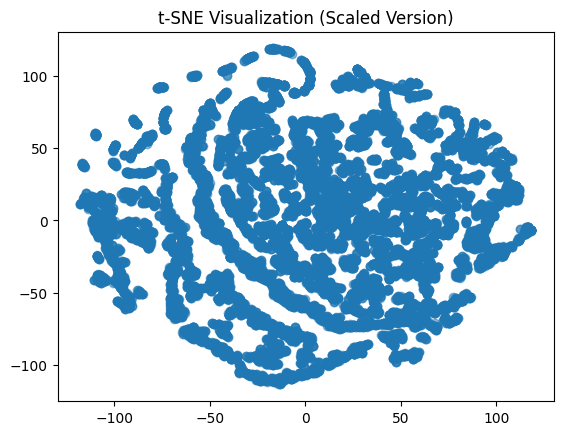

In [ ]:
# Filter out specified species from the original DataFrame
filtered_df = df[~df['ssciname'].str.contains('Brachybacterium|Brevundimonas|Bradyrhizobium')]

# Extract relevant columns for t-SNE
features_filtered = ['evalue', 'pident', 'qcovs']
X_original = filtered_df[features_filtered]

# Log transform evalue
min_positive_evalue = np.sort(X_original['evalue'].replace(0, np.nan).dropna().unique())[0]
X_original['evalue'] = X_original['evalue'].replace(0, min_positive_evalue)
X_original['evalue'] = -np.log10(X_original['evalue'])

# Standardize the features
scaler_original = StandardScaler()
X_scaled = scaler_original.fit_transform(X_original)

# Perform t-SNE for dimensionality reduction
tsne_scaled = TSNE(n_components=2, random_state=42)
X_tsne_log_1 = tsne_scaled.fit_transform(X_scaled)

# Visualize t-SNE results for the scaled version
plt.scatter(X_tsne_log_1[:, 0], X_tsne_log_1[:, 1], alpha=0.5)
plt.title('t-SNE Visualization (Scaled Version)')
plt.show()


### For non-scaled

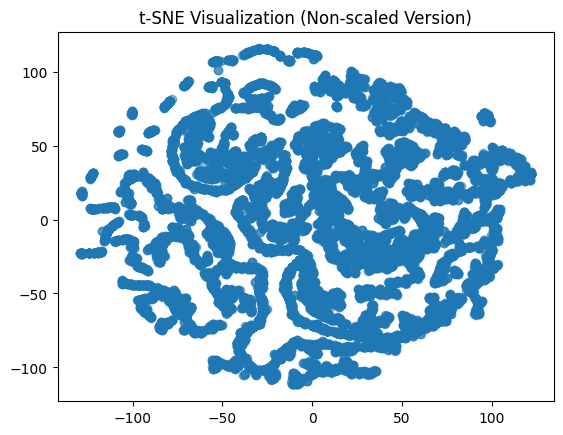

In [ ]:
# Perform t-SNE for dimensionality reduction
tsne_original = TSNE(n_components=2, random_state=42)
X_tsne_log_2 = tsne_original.fit_transform(X_original)

# Visualize t-SNE results for the original version
plt.scatter(X_tsne_log_2[:, 0], X_tsne_log_2[:, 1], alpha=0.5)
plt.title('t-SNE Visualization (Non-scaled Version)')
plt.show()


### Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-5-1abe89ce07ce>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cluster_original'] = X_clustered_original
<ipython-input-5-1abe89ce07ce>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

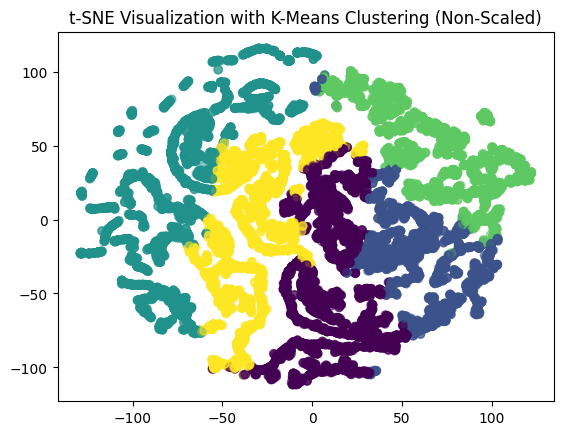

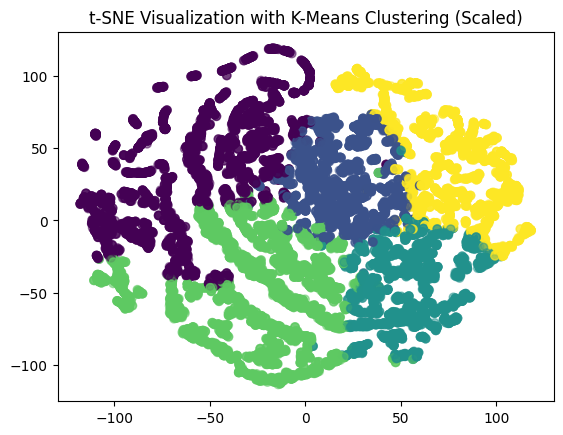

                    qseqid                                           ssciname  \
2          SRR22276237.2.1                          Streptococcus,intermedius   
3          SRR22276237.2.1                             Streptococcus,ovuberis   
4          SRR22276237.2.1                    Streptococcus,cuniculipharyngis   
5          SRR22276237.4.1                              Terrabacter,aerolatus   
6          SRR22276237.4.1                        Terrabacter,carboxydivorans   
...                    ...                                                ...   
40022  SRR22276237.14602.1                        Ornithinimicrobium,cavernae   
40023  SRR22276237.14602.1                        Corynebacterium,urogenitale   
40024  SRR22276237.14604.1                            Streptococcus,vaginalis   
40025  SRR22276237.14604.1             Streptococcus,anginosus,subsp.,whileyi   
40026  SRR22276237.14604.1  Streptococcus,constellatus,subsp.,viborgensis,...   

              evalue  piden

In [ ]:
from sklearn.cluster import KMeans

# Number of clusters
num_clusters = 5 # Adjust the number of clusters as needed

# Perform K-Means clustering for non-scaled t-SNE
kmeans_original = KMeans(n_clusters=num_clusters, random_state=42)
X_clustered_original = kmeans_original.fit_predict(X_original)

# Perform K-Means clustering for scaled t-SNE
kmeans_scaled = KMeans(n_clusters=num_clusters, random_state=42)
X_clustered_scaled = kmeans_scaled.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
filtered_df['cluster_original'] = X_clustered_original
filtered_df['cluster_scaled'] = X_clustered_scaled

# Visualize the clustered data for non-scaled t-SNE
plt.scatter(X_tsne_log_2[:, 0], X_tsne_log_2[:, 1], c=X_clustered_original, cmap='viridis', alpha=0.5)
plt.title('t-SNE Visualization with K-Means Clustering (Non-Scaled)')
plt.show()

# Visualize the clustered data for scaled t-SNE
plt.scatter(X_tsne_log_1[:, 0], X_tsne_log_1[:, 1], c=X_clustered_scaled, cmap='viridis', alpha=0.5)
plt.title('t-SNE Visualization with K-Means Clustering (Scaled)')
plt.show()

# Display the DataFrame with cluster labels
print(filtered_df[['qseqid', 'ssciname', 'evalue', 'pident', 'qcovs', 'cluster_original', 'cluster_scaled']])


In [ ]:
thresholds_scaled = filtered_df.groupby('cluster_scaled')[['evalue', 'pident', 'qcovs']].mean()
print("Thresholds for Original Clusters:")
print(thresholds_scaled)


Thresholds for Original Clusters:
                       evalue     pident      qcovs
cluster_scaled                                     
0               5.002067e-112  94.294569  78.161844
1                1.676244e-46  92.746909  68.142024
2                3.692439e-12  83.145844  71.140746
3                2.273203e-79  87.808810  78.419258
4                3.481139e-08  92.558597  49.917425


In [ ]:
thresholds_original = filtered_df.groupby('cluster_original')[['evalue', 'pident', 'qcovs']].mean()
print("Thresholds for Original Clusters:")
print(thresholds_original)


Thresholds for Original Clusters:
                         evalue     pident      qcovs
cluster_original                                     
0                 9.960321e-102  88.957057  73.522188
1                  2.142285e-58  86.582609  69.243724
2                 2.091163e-161  93.783756  78.348546
3                  3.219054e-08  90.639196  53.634746
4                 1.623067e-131  90.684805  76.225295


In [ ]:
# Display a table-like representation of clusters for non-scaled t-SNE
clusters_table_original = filtered_df[['qseqid', 'ssciname', 'evalue', 'pident', 'qcovs', 'cluster_original']]
display(clusters_table_original)

# Display a table-like representation of clusters for scaled t-SNE
clusters_table_scaled = filtered_df[['qseqid', 'ssciname', 'evalue', 'pident', 'qcovs', 'cluster_scaled']]
display(clusters_table_scaled)


,qseqid,ssciname,evalue,pident,qcovs,cluster_original
2,SRR22276237.2.1,"Streptococcus,intermedius",4.720000e-102,89.216,70,0
3,SRR22276237.2.1,"Streptococcus,ovuberis",2.200000e-100,88.889,70,0
4,SRR22276237.2.1,"Streptococcus,cuniculipharyngis",2.200000e-100,88.889,70,0
5,SRR22276237.4.1,"Terrabacter,aerolatus",1.250000e-88,81.775,77,1
6,SRR22276237.4.1,"Terrabacter,carboxydivorans",1.620000e-87,81.579,77,1
...,...,...,...,...,...,...
40022,SRR22276237.14602.1,"Ornithinimicrobium,cavernae",3.560000e-13,95.556,38,3
40023,SRR22276237.14602.1,"Corynebacterium,urogenitale",3.560000e-13,95.556,38,3
40024,SRR22276237.14604.1,"Streptococcus,vaginalis",3.840000e-24,91.566,51,3
40025,SRR22276237.14604.1,"Streptococcus,anginosus,subsp.,whileyi",3.840000e-24,91.566,51,3


,qseqid,ssciname,evalue,pident,qcovs,cluster_scaled
2,SRR22276237.2.1,"Streptococcus,intermedius",4.720000e-102,89.216,70,1
3,SRR22276237.2.1,"Streptococcus,ovuberis",2.200000e-100,88.889,70,1
4,SRR22276237.2.1,"Streptococcus,cuniculipharyngis",2.200000e-100,88.889,70,1
5,SRR22276237.4.1,"Terrabacter,aerolatus",1.250000e-88,81.775,77,2
6,SRR22276237.4.1,"Terrabacter,carboxydivorans",1.620000e-87,81.579,77,2
...,...,...,...,...,...,...
40022,SRR22276237.14602.1,"Ornithinimicrobium,cavernae",3.560000e-13,95.556,38,4
40023,SRR22276237.14602.1,"Corynebacterium,urogenitale",3.560000e-13,95.556,38,4
40024,SRR22276237.14604.1,"Streptococcus,vaginalis",3.840000e-24,91.566,51,4
40025,SRR22276237.14604.1,"Streptococcus,anginosus,subsp.,whileyi",3.840000e-24,91.566,51,4


In [ ]:
# Sort the DataFrame by original clusters
df_sorted_original = filtered_df.sort_values(by='cluster_original', ascending=True)

# Display the sorted DataFrame for original clusters
print("Sorted DataFrame by Original Clusters:")
display(df_sorted_original[['qseqid', 'ssciname', 'evalue', 'pident', 'qcovs', 'cluster_original']])

# Sort the DataFrame by scaled clusters
df_sorted_scaled = filtered_df.sort_values(by='cluster_scaled', ascending=True)

# Display the sorted DataFrame for scaled clusters
print("\nSorted DataFrame by Scaled Clusters:")
display(df_sorted_scaled[['qseqid', 'ssciname', 'evalue', 'pident', 'qcovs', 'cluster_scaled']])


Sorted DataFrame by Original Clusters:


,qseqid,ssciname,evalue,pident,qcovs,cluster_original
2,SRR22276237.2.1,"Streptococcus,intermedius",4.720000e-102,89.216,70,0
18312,SRR22276237.6705.1,"Streptococcus,intermedius",4.490000e-128,87.441,75,0
18302,SRR22276237.6700.1,"Streptococcus,constellatus,subsp.,pharyngis,SK...",5.730000e-127,86.761,78,0
18301,SRR22276237.6700.1,"Streptococcus,anginosus,SK52,=,DSM,20563",5.730000e-127,86.761,78,0
18300,SRR22276237.6700.1,"Streptococcus,intermedius",1.230000e-128,86.998,78,0
...,...,...,...,...,...,...
1498,SRR22276237.550.1,"Streptococcus,constellatus,subsp.,pharyngis,SK...",1.130000e-153,91.283,77,4
1499,SRR22276237.550.1,"Streptococcus,anginosus,SK52,=,DSM,20563",1.130000e-153,91.283,77,4
25977,SRR22276237.9503.1,"Streptococcus,uberis",2.000000e-151,90.191,77,4
1497,SRR22276237.550.1,"Streptococcus,intermedius",2.420000e-155,91.525,77,4



Sorted DataFrame by Scaled Clusters:


,qseqid,ssciname,evalue,pident,qcovs,cluster_scaled
27230,SRR22276237.9965.1,"Fusobacterium,watanabei",0.000000e+00,96.734,85,0
23958,SRR22276237.8770.1,"Cupriavidus,nantongensis",0.000000e+00,95.884,77,0
23959,SRR22276237.8770.1,"Ralstonia,solanacearum",0.000000e+00,95.874,77,0
23960,SRR22276237.8770.1,"Ralstonia,pickettii",0.000000e+00,95.874,77,0
23988,SRR22276237.8782.1,"Streptococcus,intermedius",1.450000e-151,96.341,82,0
...,...,...,...,...,...,...
6796,SRR22276237.2491.1,"Fusobacterium,hwasookii,ChDC,F128",1.730000e-37,98.851,55,4
6797,SRR22276237.2491.1,"Fusobacterium,animalis,ATCC,51191",1.730000e-37,98.851,55,4
6807,SRR22276237.2495.1,"Arthrobacter,liuii",3.570000e-36,88.889,50,4
28238,SRR22276237.10338.1,"Ralstonia,pickettii",1.050000e-30,87.500,59,4


## pairplots

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-10-7e55785c9545>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pairplot_df['evalue'] = -np.log10(pairplot_df['evalue'])


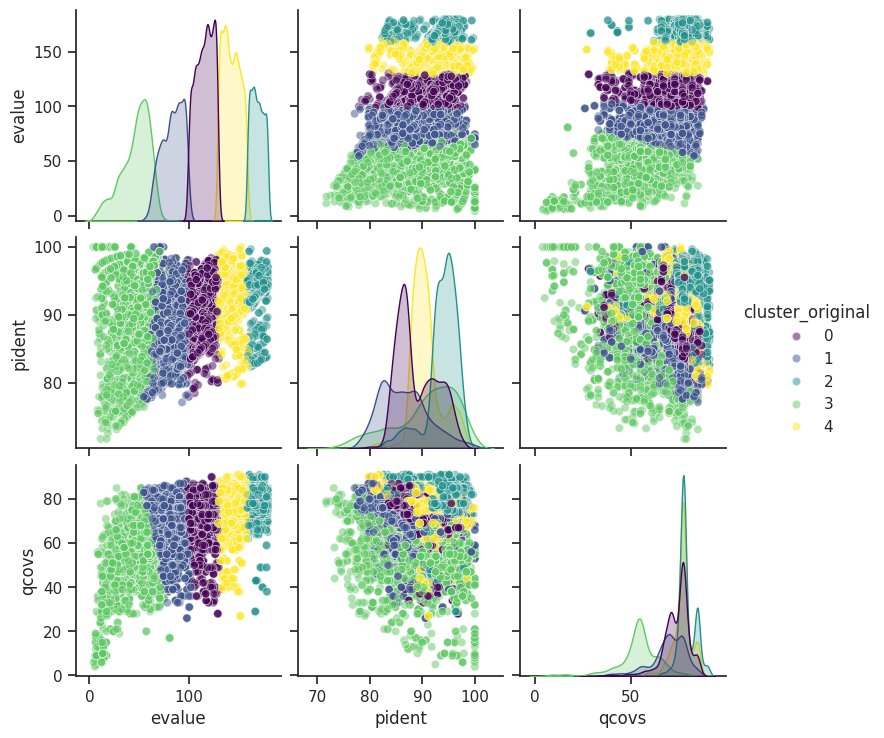

In [ ]:

# Log transform evalue for pairplot
pairplot_df = filtered_df[['evalue', 'pident', 'qcovs', 'cluster_original']]
pairplot_df['evalue'] = -np.log10(pairplot_df['evalue'])

# Create a pairplot to visualize clusters in the original measurements
sns.set(style="ticks")
sns.pairplot(pairplot_df, hue='cluster_original', palette='viridis', plot_kws={'alpha': 0.5})
plt.show()


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-11-b234f7a9f25a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pairplot_df_scaled['evalue'] = -np.log10(pairplot_df_scaled['evalue'])


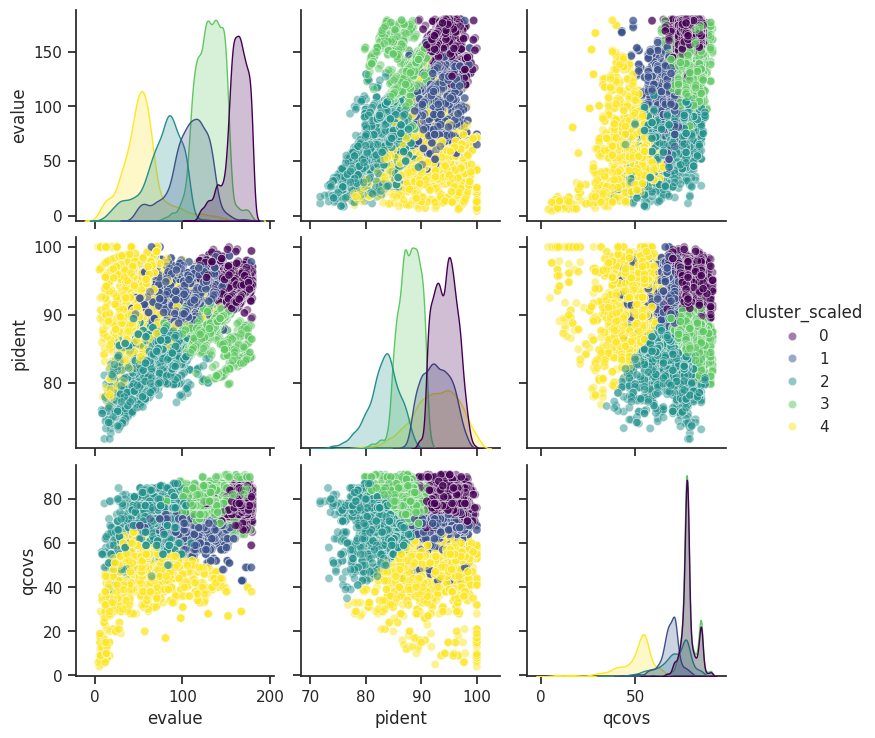

In [ ]:

# Log transform evalue for pairplot
pairplot_df_scaled = filtered_df[['evalue', 'pident', 'qcovs', 'cluster_scaled']]
pairplot_df_scaled['evalue'] = -np.log10(pairplot_df_scaled['evalue'])

# Create a pairplot to visualize clusters in the scaled measurements
sns.set(style="ticks")
sns.pairplot(pairplot_df_scaled, hue='cluster_scaled', palette='viridis', plot_kws={'alpha': 0.5})
plt.show()


## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Decision Tree classification
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_tree.fit(X_original, X_clustered_original)


DecisionTreeClassifier(max_depth=5, random_state=42)

for non-scaled version

<ipython-input-13-ca6469257be4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cluster_original'] = X_clustered_original


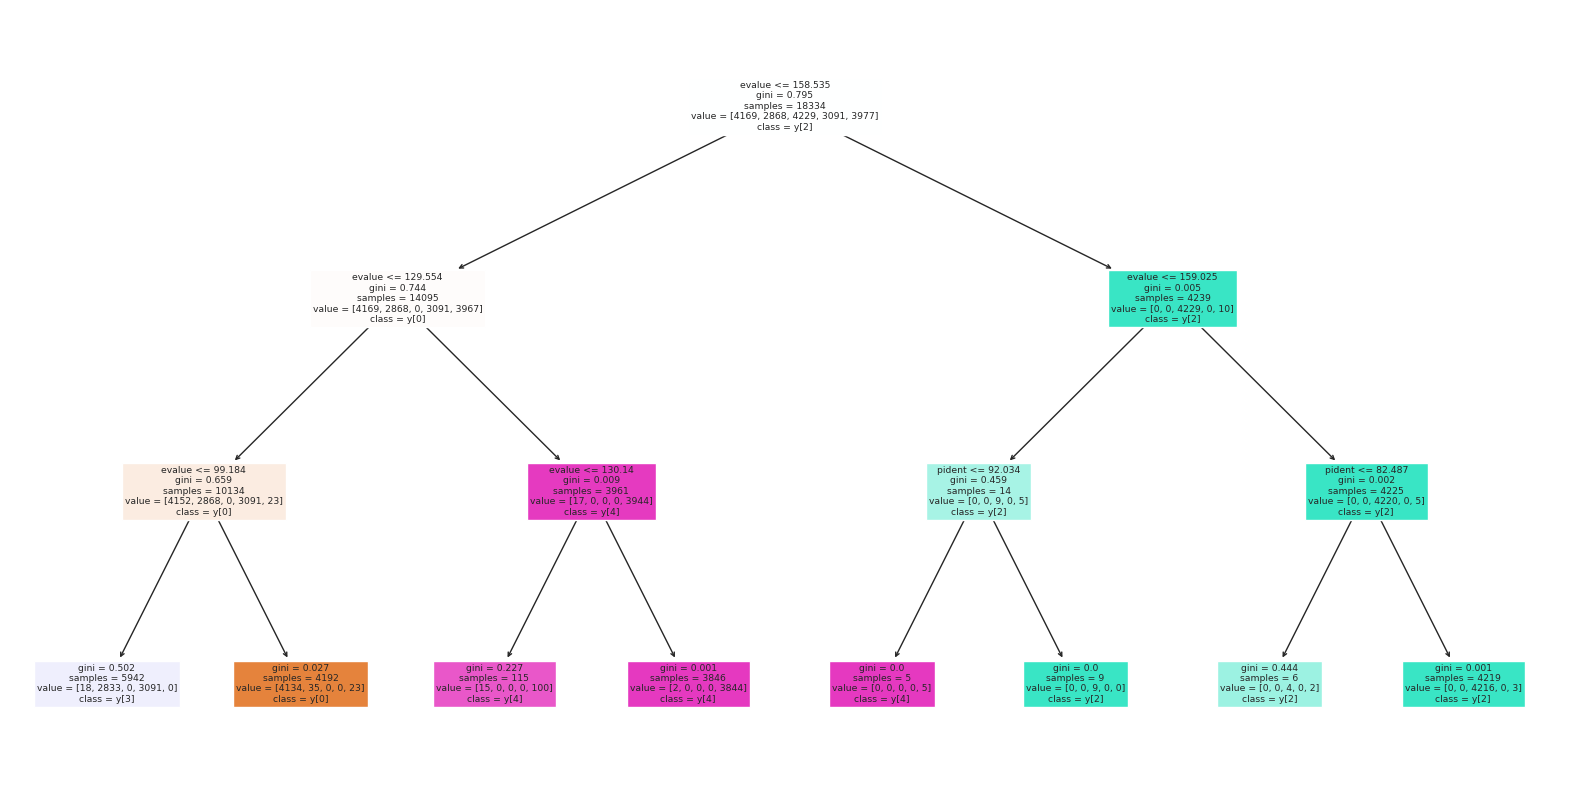

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

filtered_df['cluster_original'] = X_clustered_original

# Proceed with the Decision Tree part
features_filtered = ['evalue', 'pident', 'qcovs']

X = X_original
y = X_clustered_original

dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X, y)

plt.figure(figsize=(20,10))
plot_tree(dt_classifier, filled=True, feature_names=features_filtered, class_names=True)
plt.show()


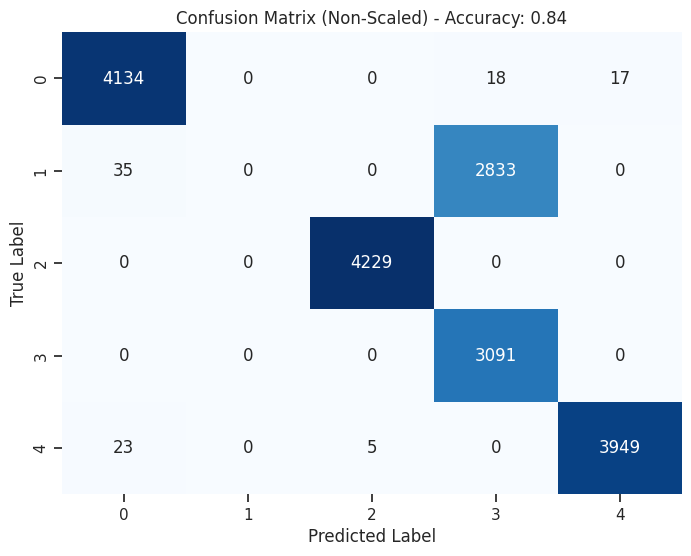

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Predict cluster labels using the Decision Tree model for non-scaled version
y_pred_original = dt_classifier.predict(X_original)

# Create a confusion matrix
conf_matrix_original = confusion_matrix(X_clustered_original, y_pred_original)

# Calculate accuracy
accuracy_original = accuracy_score(X_clustered_original, y_pred_original)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_original, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix (Non-Scaled) - Accuracy: {accuracy_original:.2f}')
plt.show()


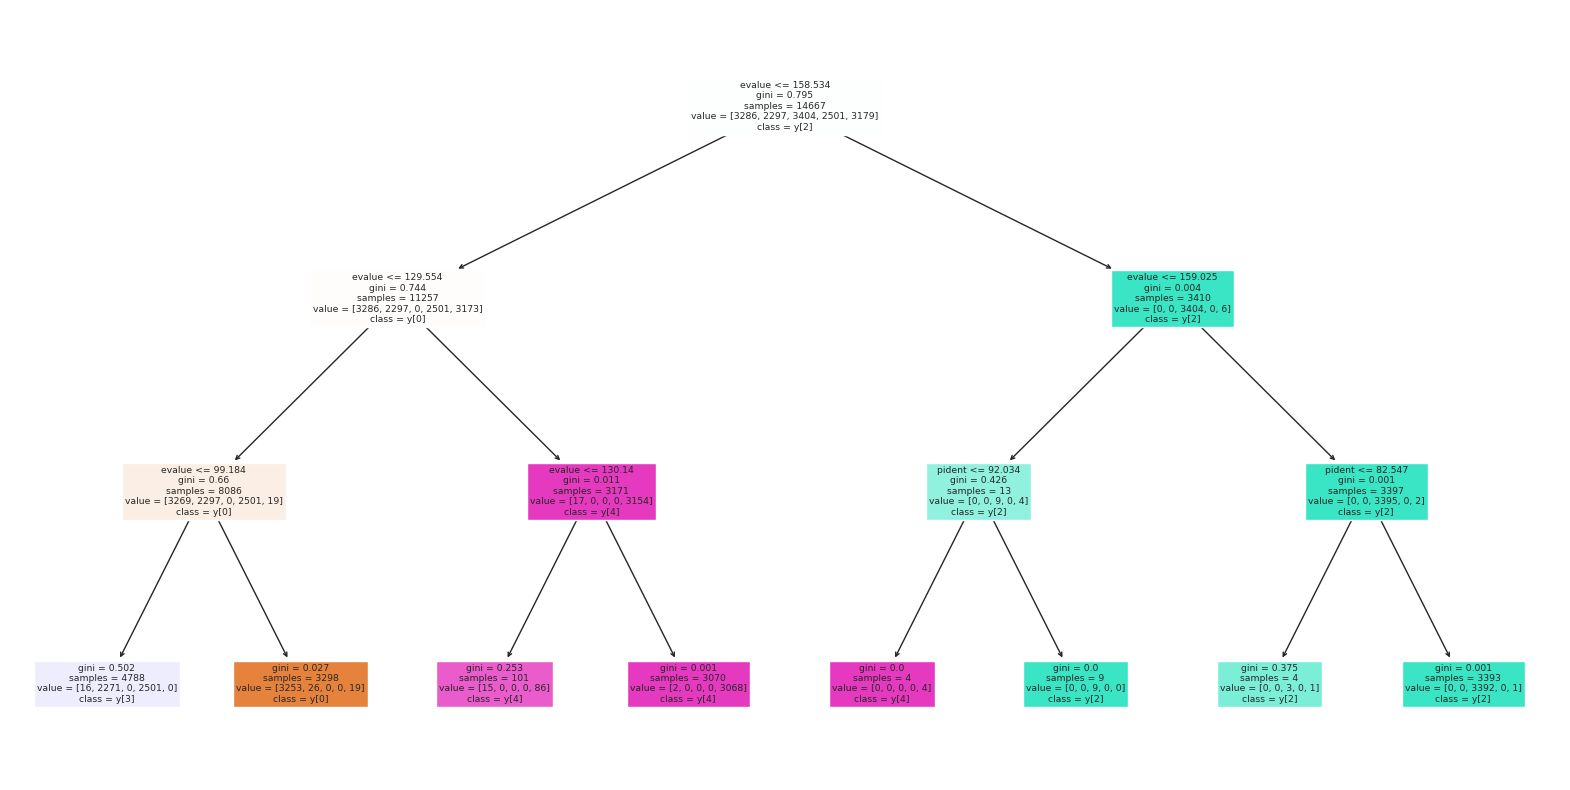

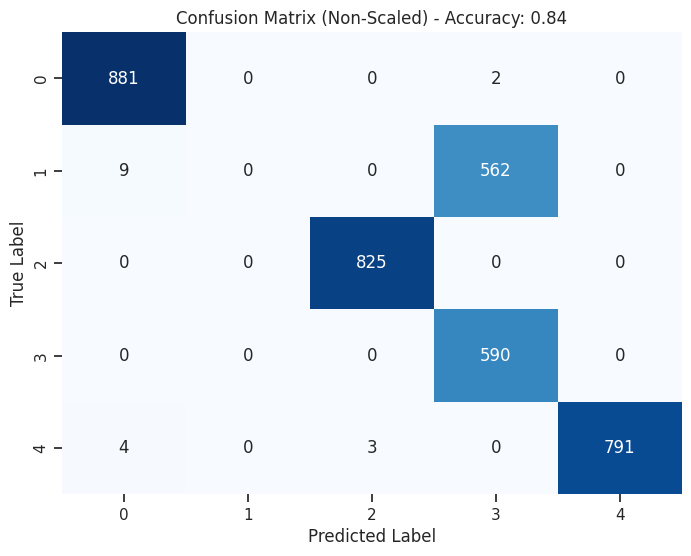

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X_clustered_original is the output from K-Means clustering
# and y is the original labels from t-SNE
X_train, X_test, y_train, y_test = train_test_split(X_original, X_clustered_original, test_size=0.2, random_state=42)

# Train the Decision Tree model on the training set
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=features_filtered, class_names=True)
plt.show()

# Predict cluster labels using the Decision Tree model for non-scaled version
y_pred_test = dt_classifier.predict(X_test)

# Create a confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Calculate accuracy
accuracy_test = accuracy_score(y_test, y_pred_test)

# Display the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix (Non-Scaled) - Accuracy: {accuracy_test:.2f}')
plt.show()


## for non-scaled I tried both variants (to divide and not divide for training and testing sets)

confusion matrix looks strange for non-scaled

## for scaled

<ipython-input-16-fa28b2a7b2c4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cluster_scaled'] = X_clustered_scaled


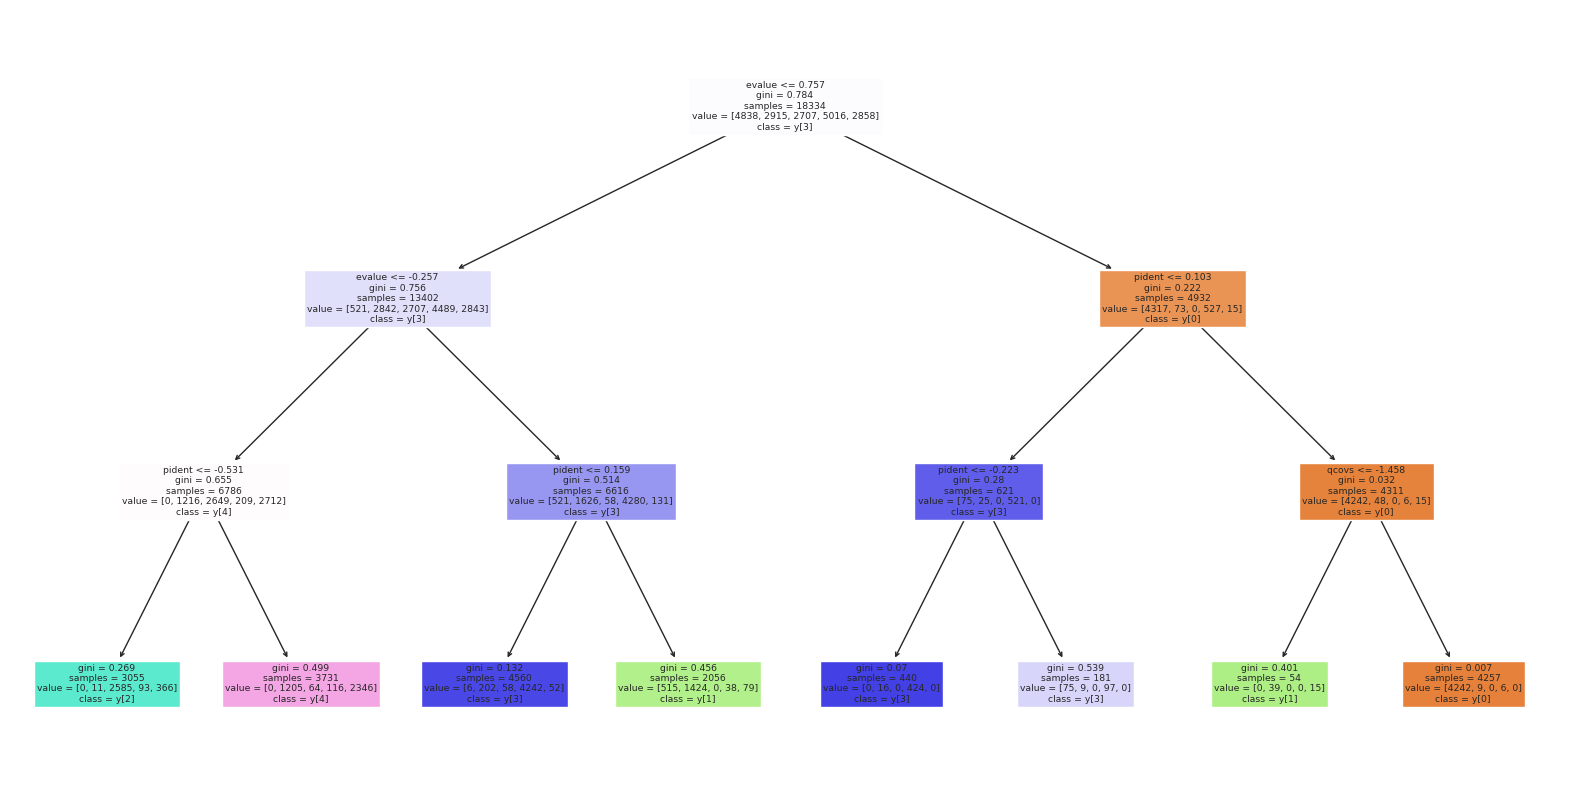

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

filtered_df['cluster_scaled'] = X_clustered_scaled

# Proceed with the Decision Tree part
features_filtered = ['evalue', 'pident', 'qcovs']

X = X_scaled
y = X_clustered_scaled

dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X, y)

plt.figure(figsize=(20,10))
plot_tree(dt_classifier, filled=True, feature_names=features_filtered, class_names=True)
plt.show()


Accuracy: 0.84
Confusion Matrix:
[[834  96   0  14   0]
 [  0 299   4  49 232]
 [  0   0 514  12   9]
 [  2   4  26 994  26]
 [  0  23  80  10 439]]


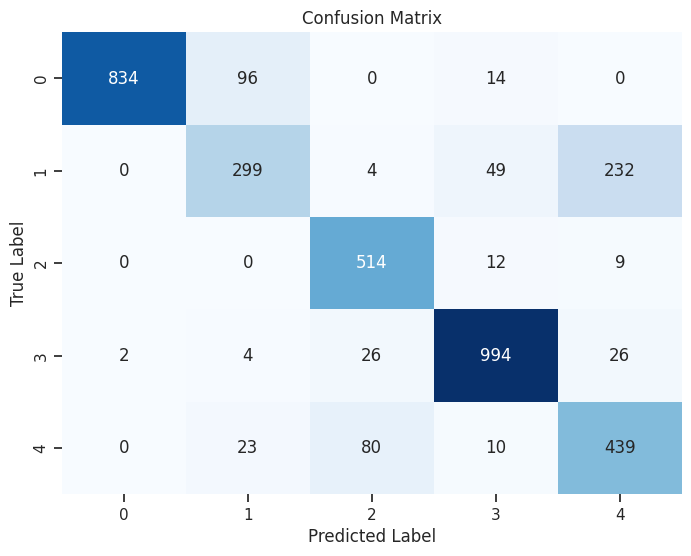

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_scaled contains the scaled features and X_clustered_scaled contains the cluster labels
X = X_scaled
y = X_clustered_scaled

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Decision Tree classifier on the training set
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Obtain the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## Rules for desion tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text
# Assuming X_clustered_original is the output from K-Means clustering
# and X_original is the non-scaled data
dt_classifier_original = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier_original.fit(X_original, X_clustered_original)

# Export the decision tree rules for the non-scaled data
tree_rules_original = export_text(dt_classifier_original, feature_names=['evalue', 'pident', 'qcovs'], show_weights=True, decimals=2)

# Print the decision tree rules for non-scaled data
print("Decision Tree Rules for Non-Scaled Data:")
print(tree_rules_original)


Decision Tree Rules for Non-Scaled Data:
|--- evalue <= 158.53
|   |--- evalue <= 129.55
|   |   |--- evalue <= 99.18
|   |   |   |--- weights: [18.00, 2833.00, 0.00, 3091.00, 0.00] class: 3
|   |   |--- evalue >  99.18
|   |   |   |--- weights: [4134.00, 35.00, 0.00, 0.00, 23.00] class: 0
|   |--- evalue >  129.55
|   |   |--- evalue <= 130.14
|   |   |   |--- weights: [15.00, 0.00, 0.00, 0.00, 100.00] class: 4
|   |   |--- evalue >  130.14
|   |   |   |--- weights: [2.00, 0.00, 0.00, 0.00, 3844.00] class: 4
|--- evalue >  158.53
|   |--- evalue <= 159.02
|   |   |--- pident <= 92.03
|   |   |   |--- weights: [0.00, 0.00, 0.00, 0.00, 5.00] class: 4
|   |   |--- pident >  92.03
|   |   |   |--- weights: [0.00, 0.00, 9.00, 0.00, 0.00] class: 2
|   |--- evalue >  159.02
|   |   |--- pident <= 82.49
|   |   |   |--- weights: [0.00, 0.00, 4.00, 0.00, 2.00] class: 2
|   |   |--- pident >  82.49
|   |   |   |--- weights: [0.00, 0.00, 4216.00, 0.00, 3.00] class: 2



In [ ]:
# Assuming X_clustered_scaled is the output from K-Means clustering
# and X_scaled is the scaled data
dt_classifier_scaled = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier_scaled.fit(X_scaled, X_clustered_scaled)

# Export the decision tree rules for the scaled data
tree_rules_scaled = export_text(dt_classifier_scaled, feature_names=['evalue', 'pident', 'qcovs'], show_weights=True, decimals=2)

# Print the decision tree rules for scaled data
print("Decision Tree Rules for Scaled Data:")
print(tree_rules_scaled)


Decision Tree Rules for Scaled Data:
|--- evalue <= 0.76
|   |--- evalue <= -0.26
|   |   |--- pident <= -0.53
|   |   |   |--- weights: [0.00, 11.00, 2585.00, 93.00, 366.00] class: 2
|   |   |--- pident >  -0.53
|   |   |   |--- weights: [0.00, 1205.00, 64.00, 116.00, 2346.00] class: 4
|   |--- evalue >  -0.26
|   |   |--- pident <= 0.16
|   |   |   |--- weights: [6.00, 202.00, 58.00, 4242.00, 52.00] class: 3
|   |   |--- pident >  0.16
|   |   |   |--- weights: [515.00, 1424.00, 0.00, 38.00, 79.00] class: 1
|--- evalue >  0.76
|   |--- pident <= 0.10
|   |   |--- pident <= -0.22
|   |   |   |--- weights: [0.00, 16.00, 0.00, 424.00, 0.00] class: 3
|   |   |--- pident >  -0.22
|   |   |   |--- weights: [75.00, 9.00, 0.00, 97.00, 0.00] class: 3
|   |--- pident >  0.10
|   |   |--- qcovs <= -1.46
|   |   |   |--- weights: [0.00, 39.00, 0.00, 0.00, 15.00] class: 1
|   |   |--- qcovs >  -1.46
|   |   |   |--- weights: [4242.00, 9.00, 0.00, 6.00, 0.00] class: 0



## Update

Adding Cluster Labels

In [ ]:
# Extract the genus name (if not already done)
filtered_df['genus'] = filtered_df['ssciname'].apply(lambda x: x.split(',')[0])

# Function to get top 5 genus per cluster
def get_top_genus_per_cluster(data, cluster_column):
    genus_counts = data.groupby([cluster_column, 'genus']).size().reset_index(name='count')
    top_genus = genus_counts.groupby(cluster_column).apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)
    return top_genus

# Get top 5 genus for original clusters
top_genus_original = get_top_genus_per_cluster(filtered_df, 'cluster_original')
print("Top 5 Genus for Original Clusters:")
print(top_genus_original)

# Get top 5 genus for scaled clusters
top_genus_scaled = get_top_genus_per_cluster(filtered_df, 'cluster_scaled')
print("\nTop 5 Genus for Scaled Clusters:")
print(top_genus_scaled)



Top 5 Genus for Original Clusters:
    cluster_original               genus  count
0                  0       Streptococcus   2207
1                  0       Fusobacterium    471
2                  0        Potamosiphon    108
3                  0      Compactococcus     70
4                  0  Ornithinimicrobium     54
5                  1       Streptococcus   1317
6                  1       Fusobacterium    288
7                  1        Potamosiphon     56
8                  1             Kocuria     48
9                  1        Arthrobacter     42
10                 2       Streptococcus   3451
11                 2       Fusobacterium    355
12                 2       Cutibacterium     45
13                 2           Ralstonia     41
14                 2            Listeria     33
15                 3       Streptococcus    955
16                 3             Kocuria    381
17                 3       Fusobacterium    288
18                 3        Arthrobacter    133
19   

<ipython-input-20-d0f6bee236c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['genus'] = filtered_df['ssciname'].apply(lambda x: x.split(',')[0])


Cluster 0: Dominated by Streptococcus, followed by Fusobacterium and other less frequent genera like Potamosiphon and Compactococcus.

Cluster 1: Similar to Cluster 0 with a dominance of Streptococcus and Fusobacterium, but also includes Kocuria and Arthrobacter.

Cluster 2: Streptococcus remains the most frequent genus, with a notable presence of Cutibacterium and Ralstonia.

Cluster 3: Features a mix of Streptococcus, Kocuria, and Fusobacterium, along with Arthrobacter and Dermabacter.

Cluster 4: Also led by Streptococcus, with Fusobacterium and other genera like Saccharothrix and Arsenicicoccus.

Clusters 0 - 4: All these clusters are primarily characterized by Streptococcus and Fusobacterium. However, each cluster contains a unique mix of other genera, such as Ralstonia, Cutibacterium, Potamosiphon, Kocuria, Saccharothrix, Ornithinimicrobium, and Arthrobacter.

**Rule 1: If a sample has a high frequency of Streptococcus and Fusobacterium, along with a notable presence of Potamosiphon, it is likely to belong to Cluster 0 (original) or Cluster 2 (scaled). **

**Rule 2: Samples with a significant presence of Kocuria and Arthrobacter, in addition to Streptococcus and Fusobacterium, are indicative of Cluster 3 (original) or Cluster 4 (scaled). **



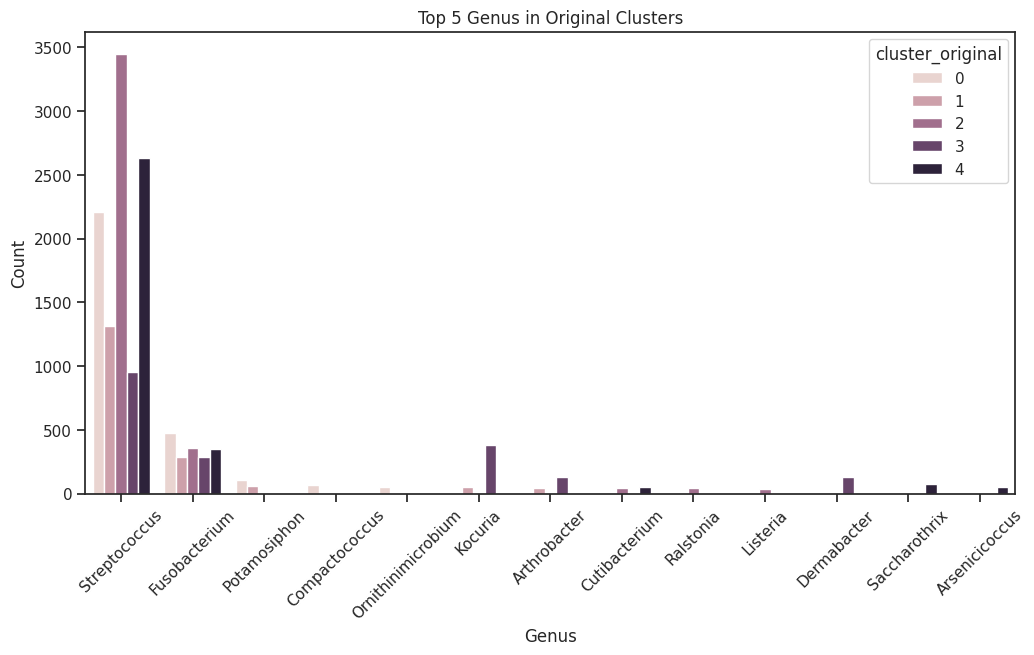

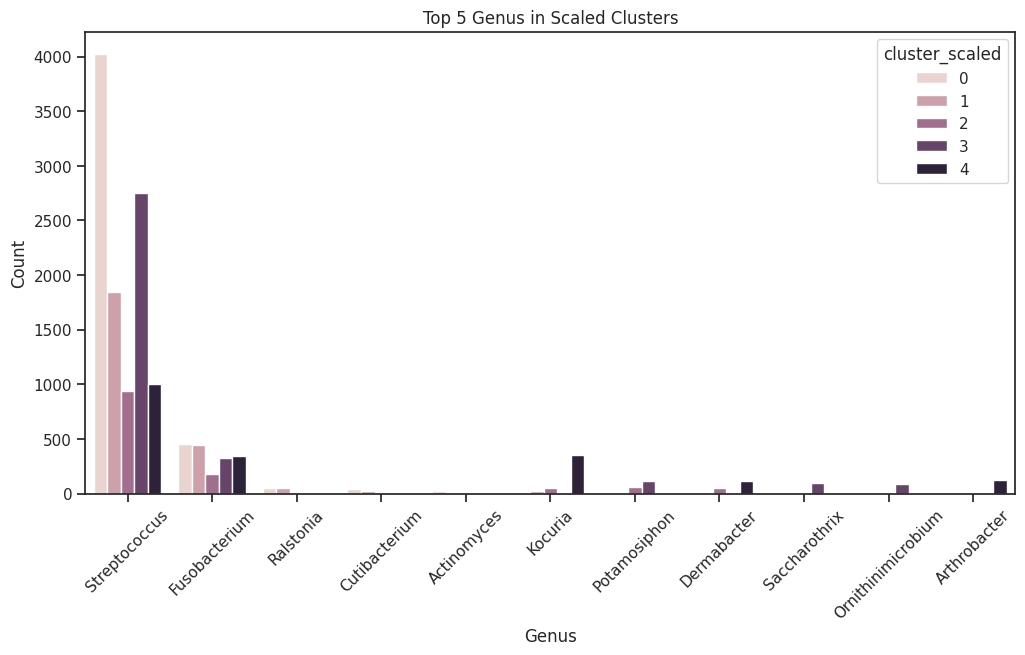

In [ ]:
# Function to plot top 5 genus for a given cluster type
def plot_top_genus(data, cluster_column, title):
    # Group by cluster and genus, then count occurrences
    genus_counts = data.groupby([cluster_column, 'genus']).size().reset_index(name='count')

    # Get top 5 genus per cluster
    top_genus = genus_counts.groupby(cluster_column).apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.barplot(x='genus', y='count', hue=cluster_column, data=top_genus)
    plt.title(title)
    plt.xlabel('Genus')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title=cluster_column)
    plt.show()

# Plotting for original clusters
plot_top_genus(filtered_df, 'cluster_original', 'Top 5 Genus in Original Clusters')

# Plotting for scaled clusters
plot_top_genus(filtered_df, 'cluster_scaled', 'Top 5 Genus in Scaled Clusters')


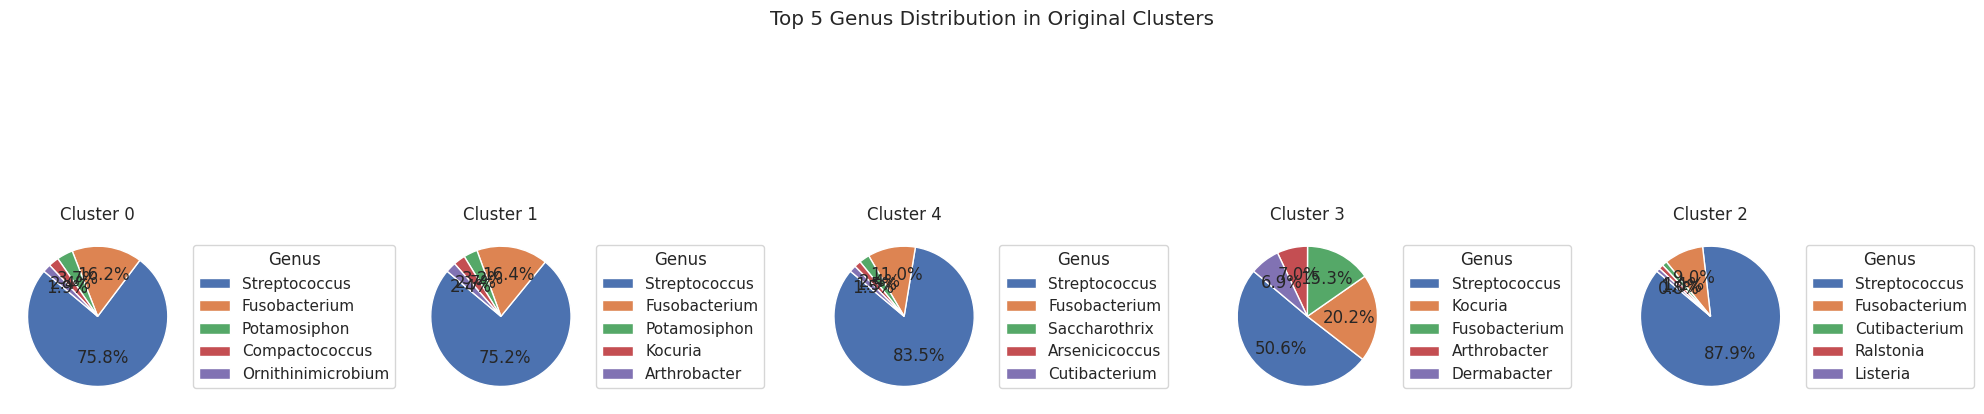

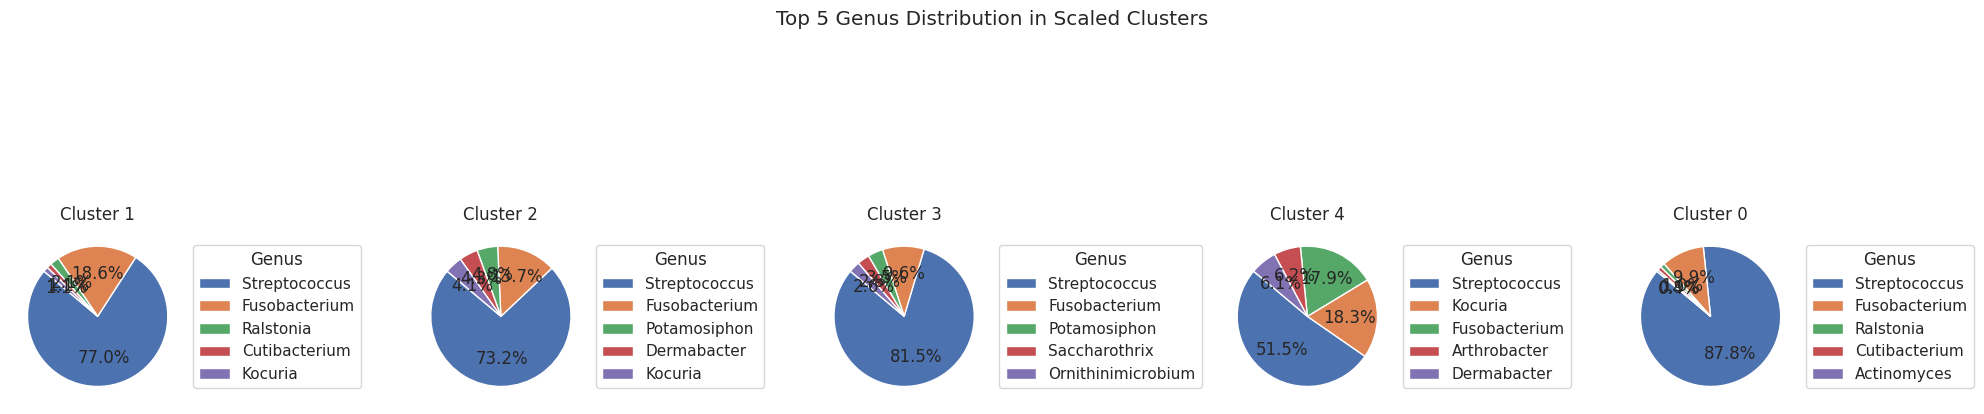

In [ ]:
import matplotlib.pyplot as plt

# Function to plot top 5 genus as pie charts for a given cluster type
def plot_top_genus_pie_improved(data, cluster_column, title):
    # Group by cluster and genus, then count occurrences
    genus_counts = data.groupby([cluster_column, 'genus']).size().reset_index(name='count')

    # Calculate total counts per cluster
    total_counts = genus_counts.groupby(cluster_column)['count'].transform('sum')

    # Calculate percentages
    genus_counts['percentage'] = (genus_counts['count'] / total_counts) * 100

    # Get top 5 genus per cluster
    top_genus = genus_counts.groupby(cluster_column).apply(lambda x: x.nlargest(5, 'percentage')).reset_index(drop=True)

    # Number of clusters
    num_clusters = data[cluster_column].nunique()

    # Create subplots for each cluster
    fig, axs = plt.subplots(1, num_clusters, figsize=(20, 6))
    fig.suptitle(title)

    # Create a pie chart for each cluster
    for i, cluster in enumerate(data[cluster_column].unique()):
        cluster_data = top_genus[top_genus[cluster_column] == cluster]
        wedges, texts, autotexts = axs[i].pie(cluster_data['percentage'], labels=None, autopct='%1.1f%%', startangle=140)
        axs[i].set_title(f'Cluster {cluster}')

        # Adding legend
        axs[i].legend(wedges, cluster_data['genus'], title="Genus", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    plt.tight_layout()
    plt.show()


# Plotting pie charts for original clusters
plot_top_genus_pie_improved(filtered_df, 'cluster_original', 'Top 5 Genus Distribution in Original Clusters')

# Plotting pie charts for scaled clusters
plot_top_genus_pie_improved(filtered_df, 'cluster_scaled', 'Top 5 Genus Distribution in Scaled Clusters')


**Interpretation of Genus Distribution in Original Clusters:**

Cluster 0: Predominantly Streptococcus with a notable presence of Fusobacterium. Genus like Potamosiphon, Compactococcus, and Ornithinimicrobium are less common.

Cluster 1: Similar composition to Cluster 0 but with the presence of Kocuria and Arthrobacter.

Cluster 2: Streptococcus is still dominant, but Listeria and Ralstonia are present, which may indicate a different environmental or clinical context.

Cluster 3: There's a significant presence of Kocuria, which could be indicative of a specific niche or sample type.

Cluster 4: Streptococcus and Fusobacterium are still dominant, but Saccharothrix and Arsenicicoccus suggest a unique cluster possibly correlated with specific environmental factors.

**Interpretation of Genus Distribution in Scaled Clusters:**

Cluster 0: Overwhelming majority of Streptococcus, with Fusobacterium and Actinomyces suggesting a diverse bacterial environment.

Cluster 1: Largely Streptococcus with Fusobacterium, Ralstonia, and Cutibacterium, which could be related to certain health or soil conditions.

Cluster 2: Streptococcus dominates, with a fair representation of Potamosiphon and Dermabacter, pointing to a potentially different ecological or physiological setting.

Cluster 3 and 4: These clusters have significant portions of Streptococcus and Fusobacterium, with Cluster 3 having a substantial part of Saccharothrix and Ornithinimicrobium, and Cluster 4 showing Kocuria and Arthrobacter, which could indicate variations in the microbial communities or sample sources.

**Potential Rules:**

Rule for Cluster 0 (Original and Scaled): If a sample contains predominantly Streptococcus, with Fusobacterium as the secondary genus, it is likely to be classified in Cluster 0.

Rule for Cluster 1 (Original): Presence of Kocuria and Arthrobacter, in addition to Streptococcus and Fusobacterium, may indicate classification in Cluster 1.

Rule for Cluster 2 (Scaled): A sample with a combination of Streptococcus, Fusobacterium, Potamosiphon, and Dermabacter is likely to belong to Cluster 2.

Rule for Cluster 3 (Original): A higher representation of Kocuria could be a distinguishing feature for this cluster.

Rule for Cluster 4 (Scaled): The presence of Kocuria and Arthrobacter, along with the main genera Streptococcus and Fusobacterium, might be characteristic of Cluster 4.

## Interpret Clustering Results

Mean values for each feature in each original cluster:
                         evalue     pident      qcovs
cluster_original                                     
0                 9.960321e-102  88.957057  73.522188
1                  2.142285e-58  86.582609  69.243724
2                 2.091163e-161  93.783756  78.348546
3                  3.219054e-08  90.639196  53.634746
4                 1.623067e-131  90.684805  76.225295

Mean values for each feature in each scaled cluster:
                       evalue     pident      qcovs
cluster_scaled                                     
0               5.002067e-112  94.294569  78.161844
1                1.676244e-46  92.746909  68.142024
2                3.692439e-12  83.145844  71.140746
3                2.273203e-79  87.808810  78.419258
4                3.481139e-08  92.558597  49.917425


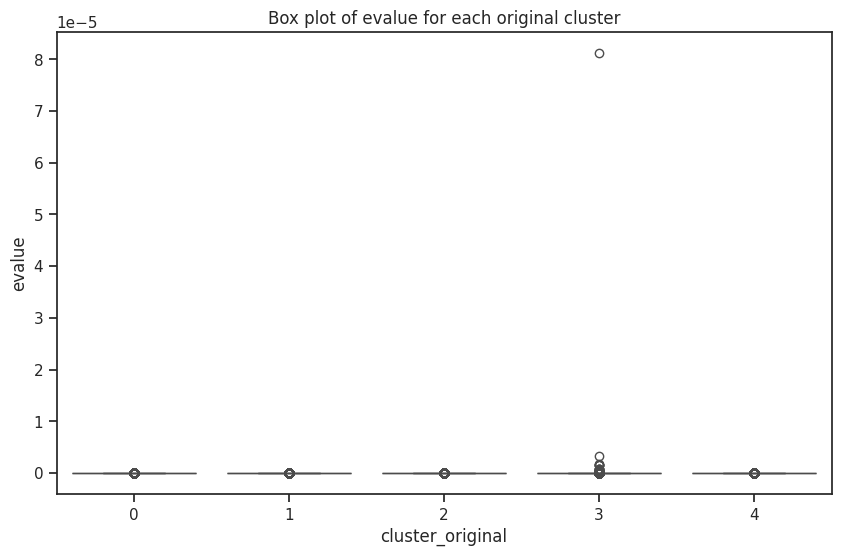

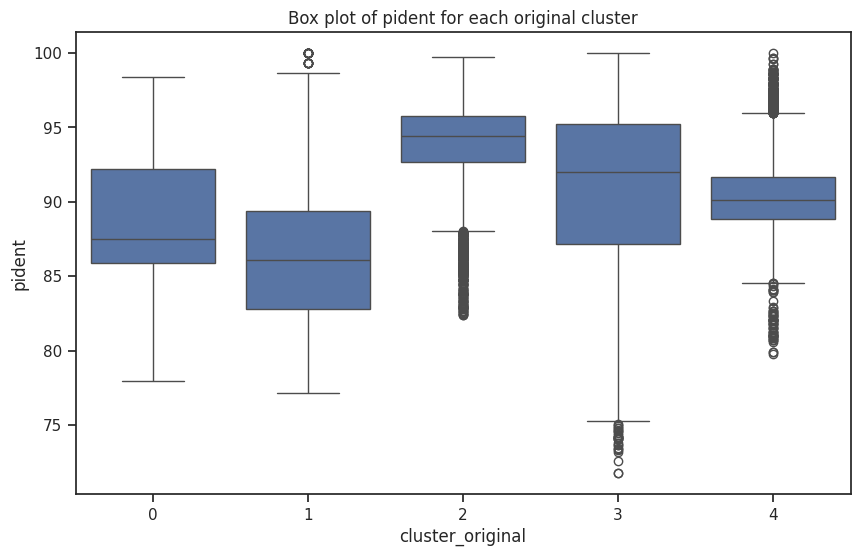

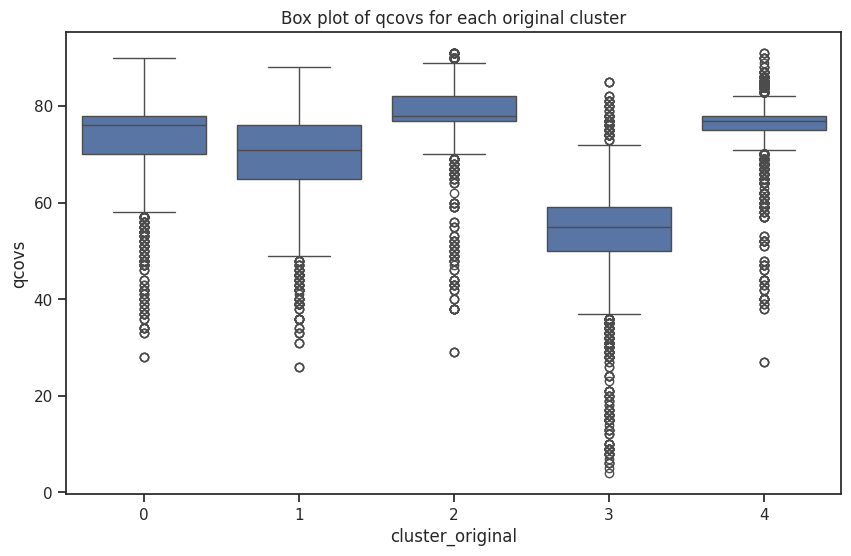

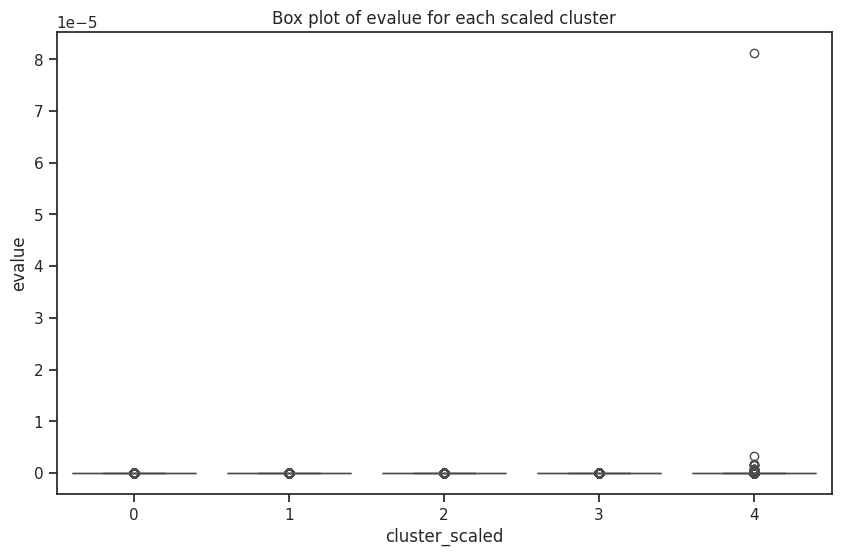

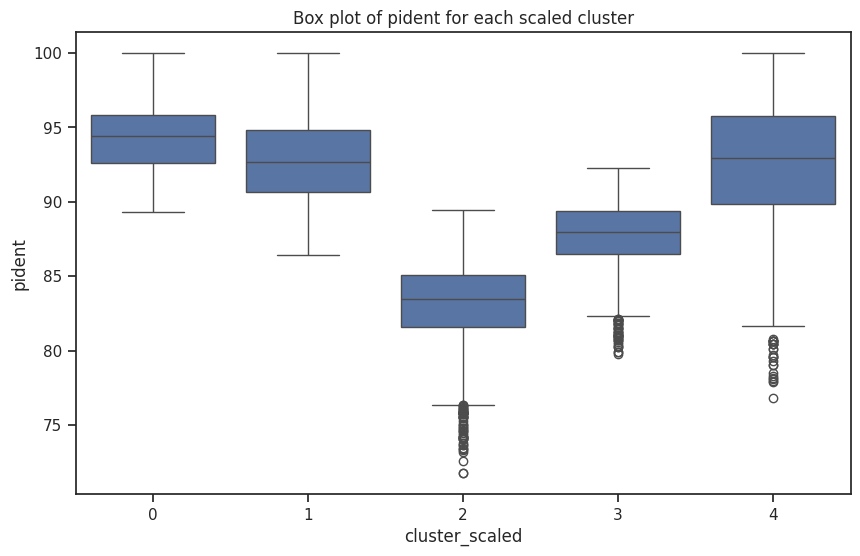

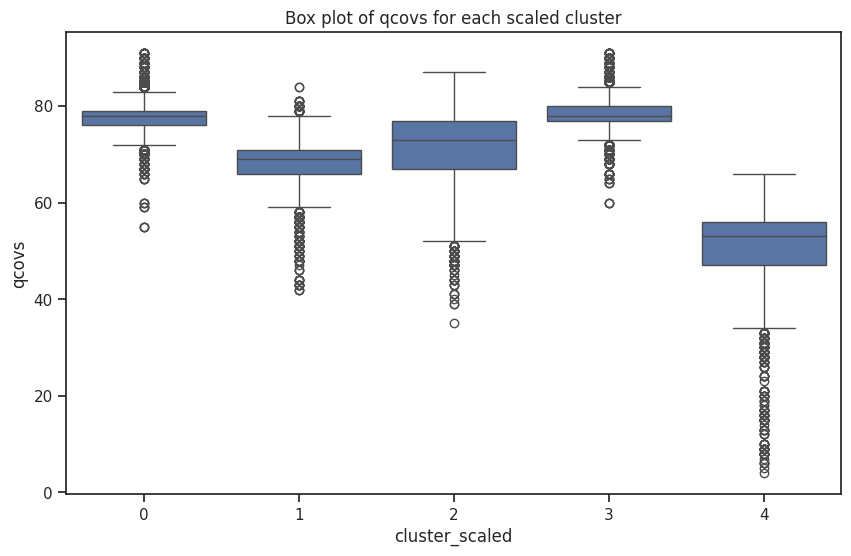

In [ ]:
# Calculate mean or median for each cluster
cluster_means_original = filtered_df.groupby('cluster_original')[['evalue', 'pident', 'qcovs']].mean()
print("Mean values for each feature in each original cluster:")
print(cluster_means_original)

cluster_means_scaled = filtered_df.groupby('cluster_scaled')[['evalue', 'pident', 'qcovs']].mean()
print("\nMean values for each feature in each scaled cluster:")
print(cluster_means_scaled)

# Create box plots for each feature across clusters for the original data
for feature in ['evalue', 'pident', 'qcovs']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster_original', y=feature, data=filtered_df)
    plt.title(f'Box plot of {feature} for each original cluster')
    plt.show()

# Create box plots for each feature across clusters for the scaled data
for feature in ['evalue', 'pident', 'qcovs']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster_scaled', y=feature, data=filtered_df)
    plt.title(f'Box plot of {feature} for each scaled cluster')
    plt.show()


**Box Plot Interpretations:**
evalue:
The evalue box plots for both original and scaled clusters are quite similar, showing very low e-values across all clusters, which indicates highly significant BLAST hits. There are few outliers, suggesting that most sequences within each cluster match very closely to the database sequences.

pident (Percent Identity):
The percent identity is quite high across all clusters, particularly in the scaled data, which indicates a high level of similarity between the query sequences and the matched database sequences. There is variation across clusters, with Cluster 2 generally having the highest median percent identity, which might be indicative of sequences that are more conserved or well-characterized in the database.

qcovs (Query Coverage):
Query coverage varies more distinctly between clusters. Clusters with higher median query coverage (like Cluster 2 and 0 in the scaled data) suggest that the sequences in these clusters align over a larger portion of their length to the database sequences, which could mean they are more complete or the database is more comprehensive for these sequences.

**Potential Rules Based on Box Plots and Mean Values:**
High Significance Rule: If an evalue is below the threshold (for example, 1e-50), the match can be considered highly significant. This seems to be the case across all clusters.

Identity Threshold Rule: A higher pident (for example, above 90%) might suggest that the sequence belongs to a cluster with more conserved sequences (like Cluster 0 in original data or Cluster 2 in scaled data).

Coverage Threshold Rule: A qcovs above a certain threshold (for example, above 75%) may be indicative of a cluster with more complete alignments (like Cluster 2 in original data).

**Summary Statistics Interpretations:**

Cluster 0: Shows high significance in BLAST hits with moderate percent identity and query coverage, potentially representing a diverse but well-characterized set of sequences.

Cluster 1: Displays less significance and lower percent identity and query coverage, which might indicate either more novel sequences or sequences with less representation in the database.

Cluster 2: Characterized by very significant BLAST hits with very high percent identity and query coverage, likely representing well-conserved and well-characterized sequences.

Cluster 3: Shows moderate e-value significance, lower percent identity, and variable query coverage, possibly indicating a more varied cluster with both conserved and less-characterized sequences.

Cluster 4: Has significant BLAST hits with high percent identity but lower query coverage, suggesting the presence of well-characterized but perhaps shorter or more fragmented sequences.

Rule formulation based K-means observation

In [ ]:
# For the original data clusters
print("Original Data Clusters:\n")
for cluster in filtered_df['cluster_original'].unique():
    cluster_data = filtered_df[filtered_df['cluster_original'] == cluster]
    for feature in ['evalue', 'pident', 'qcovs']:
        lower_quartile = cluster_data[feature].quantile(0.25)
        upper_quartile = cluster_data[feature].quantile(0.75)
        median = cluster_data[feature].median()
        print(f"Cluster {cluster}, Feature '{feature}':")
        print(f"  25th percentile (lower threshold): {lower_quartile}")
        print(f"  75th percentile (upper threshold): {upper_quartile}")
        print(f"  Median: {median}")
        print("  Potential rule: If '{}'>{} and '{}'<{}, then 'cluster_original'={}".format(
            feature, lower_quartile, feature, upper_quartile, cluster))
    print("\n")


Original Data Clusters:

Cluster 0, Feature 'evalue':
  25th percentile (lower threshold): 9.370000000000001e-124
  75th percentile (upper threshold): 3.2500000000000003e-109
  Median: 5.5300000000000005e-117
  Potential rule: If 'evalue'>9.370000000000001e-124 and 'evalue'<3.2500000000000003e-109, then 'cluster_original'=0
Cluster 0, Feature 'pident':
  25th percentile (lower threshold): 85.897
  75th percentile (upper threshold): 92.188
  Median: 87.469
  Potential rule: If 'pident'>85.897 and 'pident'<92.188, then 'cluster_original'=0
Cluster 0, Feature 'qcovs':
  25th percentile (lower threshold): 70.0
  75th percentile (upper threshold): 78.0
  Median: 76.0
  Potential rule: If 'qcovs'>70.0 and 'qcovs'<78.0, then 'cluster_original'=0


Cluster 1, Feature 'evalue':
  25th percentile (lower threshold): 4.58e-93
  75th percentile (upper threshold): 1.3749999999999998e-75
  Median: 7.71e-85
  Potential rule: If 'evalue'>4.58e-93 and 'evalue'<1.3749999999999998e-75, then 'cluster_origi

Cluster 0 (Original):
evalue: Very significant matches to the database, with a narrow interquartile range (IQR) indicating consistency.
pident: Good sequence similarity with a median of 87.469%.
qcovs: High query coverage with a median of 76%, suggesting good alignment lengths.

Cluster 1 (Original):
evalue: Slightly less significant matches than Cluster 0 but still quite low e-values.
pident: Lower sequence similarity compared to Cluster 0, with a median of 86.102%.
qcovs: Slightly lower query coverage with a median of 71%, possibly indicating shorter alignments.

Cluster 2 (Original):
evalue: Extremely significant matches, with a median e-value of 0, indicating that these matches are among the most significant in the dataset.
pident: Very high sequence similarity with a median of 94.387%.
qcovs: High query coverage with a median of 78%, indicating long alignments.

Cluster 3 (Original):
evalue: Less significant matches than Clusters 0 and 2 but still significant.
pident: Wider range of sequence similarity, indicating more variability in match quality.
qcovs: Lower and more variable query coverage with a median of 55%, indicating shorter or more fragmented alignments.

Cluster 4 (Original):
evalue: Highly significant matches, similar to Cluster 0.
pident: High sequence similarity with a median of 90.12%.
qcovs: Good query coverage with a median of 77%, similar to Cluster 2.

**Potential Rules for Classification:**

These rules can be used to preliminarily classify new sequences based on their BLAST statistics. However, they should be further tested for accuracy and robustness:

Cluster 0 Rule: If a sequence has an e-value between 9.37e-124 and 3.25e-109, a percent identity between 85.897 and 92.188, and a query coverage between 70 and 78, it may be classified into Cluster 0.

Cluster 1 Rule: Sequences with an e-value between 4.58e-93 and 1.37e-75, a percent identity between 82.817 and 89.399, and a query coverage between 65 and 76 might belong to Cluster 1.

Cluster 2 Rule: Sequences with an e-value near 0 and less than 9.03e-170, a percent identity between 92.654 and 95.739, and a query coverage between 77 and 82 are likely to be classified into Cluster 2.

Cluster 3 Rule: If a sequence has an e-value between 8.14e-58 and 2.51e-38, a percent identity between 87.192 and 95.254, and a query coverage between 50 and 59, it might be categorized into Cluster 3.

Cluster 4 Rule: Sequences with an e-value between 7.2e-151 and 2.02e-136, a percent identity between 88.81 and 91.667, and a query coverage between 75 and 78 could be considered for Cluster 4.

In [ ]:
# For the scaled data clusters
print("Scaled Data Clusters:\n")
for cluster in filtered_df['cluster_scaled'].unique():
    cluster_data = filtered_df[filtered_df['cluster_scaled'] == cluster]
    for feature in ['evalue', 'pident', 'qcovs']:
        lower_quartile = cluster_data[feature].quantile(0.25)
        upper_quartile = cluster_data[feature].quantile(0.75)
        median = cluster_data[feature].median()
        print(f"Cluster {cluster}, Feature '{feature}':")
        print(f"  25th percentile (lower threshold): {lower_quartile:.2e}")
        print(f"  75th percentile (upper threshold): {upper_quartile:.2e}")
        print(f"  Median: {median:.2e}")
        # Define a potential rule based on the IQR
        print(f"  Potential rule: If '{feature}' > {lower_quartile:.2e} and '{feature}' < {upper_quartile:.2e}, then 'cluster_scaled' = {cluster}")
    print("\n")


Scaled Data Clusters:

Cluster 1, Feature 'evalue':
  25th percentile (lower threshold): 2.22e-125
  75th percentile (upper threshold): 1.51e-96
  Median: 1.33e-111
  Potential rule: If 'evalue' > 2.22e-125 and 'evalue' < 1.51e-96, then 'cluster_scaled' = 1
Cluster 1, Feature 'pident':
  25th percentile (lower threshold): 9.06e+01
  75th percentile (upper threshold): 9.48e+01
  Median: 9.27e+01
  Potential rule: If 'pident' > 9.06e+01 and 'pident' < 9.48e+01, then 'cluster_scaled' = 1
Cluster 1, Feature 'qcovs':
  25th percentile (lower threshold): 6.60e+01
  75th percentile (upper threshold): 7.10e+01
  Median: 6.90e+01
  Potential rule: If 'qcovs' > 6.60e+01 and 'qcovs' < 7.10e+01, then 'cluster_scaled' = 1


Cluster 2, Feature 'evalue':
  25th percentile (lower threshold): 3.94e-93
  75th percentile (upper threshold): 1.75e-65
  Median: 1.35e-81
  Potential rule: If 'evalue' > 3.94e-93 and 'evalue' < 1.75e-65, then 'cluster_scaled' = 2
Cluster 2, Feature 'pident':
  25th percentile 

Cluster 1 (Scaled):
evalue: Extremely significant matches with a narrow IQR, indicating a consistent level of match significance across the cluster.
pident: High sequence similarity, with the middle 50% of the cluster having percent identities between approximately 90.6% and 94.8%.
qcovs: Generally good query coverage, with the middle 50% of the cluster having query coverages between 66% and 71%.

Cluster 2 (Scaled):
evalue: Very significant matches, with a broader IQR, suggesting some variability in the significance level of matches.
pident: Moderate sequence similarity, with a lower IQR compared to Cluster 1, indicating more variability in sequence similarity.
qcovs: The middle 50% of the cluster has query coverages between 67% and 77%.

Cluster 3 (Scaled):
evalue: Extremely significant matches, with a tight IQR similar to Cluster 1, suggesting high consistency in match significance.
pident: High sequence similarity, with the middle 50% having percent identities between approximately 86.5% and 89.3%.
qcovs: High query coverage, with the middle 50% ranging between 77% and 80%.

Cluster 4 (Scaled):
evalue: Significant matches, with a much broader IQR, indicating a wide range of match significances.
pident: High sequence similarity, with the middle 50% having percent identities between approximately 89.9% and 95.7%.
qcovs: Lower query coverage compared to other clusters, with the middle 50% ranging between 47% and 56%.

Cluster 0 (Scaled):
evalue: The tightest IQR of all, indicating extremely significant and consistent matches.
pident: Very high sequence similarity, with the middle 50% having percent identities between approximately 92.6% and 95.9%.
qcovs: High and consistent query coverage, with the middle 50% ranging between 76% and 79%.

**Potential Classification Rules:**

These rules can serve as guidelines for classifying sequences into clusters based on the BLAST statistics:

Cluster 1 Rule: If evalue is between 2.22e-125 and 1.51e-96, pident is between 90.6% and 94.8%, and qcovs is between 66% and 71%, classify the sequence into Cluster 1.

Cluster 2 Rule: For evalue between 3.94e-93 and 1.75e-65, pident between 81.6% and 85.1%, and qcovs between 67% and 77%, classify into Cluster 2.

Cluster 3 Rule: If evalue is between 7.25e-146 and 2.12e-121, pident is between 86.5% and 89.3%, and qcovs is between 77% and 80%, classify the sequence into Cluster 3.

Cluster 4 Rule: For evalue between 6.24e-64 and 2.27e-42, pident between 89.9% and 95.7%, and qcovs between 47% and 56%, classify into Cluster 4.

Cluster 0 Rule: If evalue is extremely low (near 0 and less than 6.81e-161), pident is between 92.6% and 95.9%, and qcovs is between 76% and 79%, classify the sequence into Cluster 0.

Detaiked cluster Analysis

In [ ]:

# First, let's extract the genus from the 'ssciname' column
filtered_df['genus'] = filtered_df['ssciname'].apply(lambda x: x.split(',')[0])

# Analyzing each cluster for genus distribution
for cluster in filtered_df['cluster_original'].unique():
    print(f"Analysis for Cluster {cluster}:")
    cluster_data = filtered_df[filtered_df['cluster_original'] == cluster]

    # Summary statistics for each feature in the cluster
    summary_stats = cluster_data[['evalue', 'pident', 'qcovs']].describe()
    print("Summary Statistics:")
    print(summary_stats)

    # Frequency of different genera in the cluster
    genus_counts = cluster_data['genus'].value_counts()
    print("Genus Distribution:")
    print(genus_counts)
    print("\n")


Analysis for Cluster 0:
Summary Statistics:
              evalue       pident        qcovs
count   4.169000e+03  4169.000000  4169.000000
mean   9.960321e-102    88.957057    73.522188
std    1.061010e-100     3.821585     7.575535
min    3.030000e-131    77.952000    28.000000
25%    9.370000e-124    85.897000    70.000000
50%    5.530000e-117    87.469000    76.000000
75%    3.250000e-109    92.188000    78.000000
max     3.050000e-99    98.400000    90.000000
Genus Distribution:
Streptococcus            2207
Fusobacterium             471
Potamosiphon              108
Compactococcus             70
Ornithinimicrobium         54
                         ... 
Limnospira                  1
Actinobacillus              1
Flavimobilis                1
Jonesia                     1
Flaviaesturariibacter       1
Name: genus, Length: 259, dtype: int64


Analysis for Cluster 1:
Summary Statistics:
              evalue       pident        qcovs
count   2.868000e+03  2868.000000  2868.000000
mean

<ipython-input-28-1cfcd83ebe38>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['genus'] = filtered_df['ssciname'].apply(lambda x: x.split(',')[0])


**Genus Distribution Interpretation:**
Cluster 0: Dominated by Streptococcus, with Fusobacterium also being significant. The presence of a wide variety of other genera indicates a diverse cluster.

Cluster 1: Similar to Cluster 0 with Streptococcus and Fusobacterium being the most common, but with different minority genera.

Cluster 2: Overwhelmingly composed of Streptococcus, suggesting a highly specific or conserved set of sequences.

Cluster 3: A diverse cluster with Streptococcus still leading but a different composition of other genera like Kocuria and Arthrobacter.

Cluster 4: Again, Streptococcus and Fusobacterium are the most common, with other genera present in smaller numbers.

**Potential Classification Rules:**
Based on the statistical summaries and genus distribution, we can formulate the following rules:

Rule for Clusters with Streptococcus Dominance: If a sequence is from a genus that makes up a significant portion of a cluster (e.g., Streptococcus in Cluster 0 or 2), and its BLAST statistics fall within the IQR for that cluster, it can be classified into that cluster.

Rule for Diversity: If a sequence is from a genus that appears in smaller numbers and has BLAST statistics close to the median values for a specific cluster, it may indicate a diverse cluster (e.g., Cluster 3).

Rule for Specificity: Clusters with a narrow IQR and few unique genera (e.g., Cluster 2) may represent more specialized or conserved sequences. Sequences that fit within these strict thresholds are likely to be part of such clusters.

Defining Tresholds

---



In [ ]:
# Analyzing thresholds for each feature in each cluster
for cluster in filtered_df['cluster_original'].unique():
    print(f"Thresholds for Cluster {cluster}:")
    cluster_data = filtered_df[filtered_df['cluster_original'] == cluster]

    for feature in ['evalue', 'pident', 'qcovs']:
        lower_threshold = cluster_data[feature].quantile(0.25)
        upper_threshold = cluster_data[feature].quantile(0.75)
        print(f"Feature: {feature}")
        print(f"  Lower Threshold: {lower_threshold}")
        print(f"  Upper Threshold: {upper_threshold}")
    print("\n")


Thresholds for Cluster 0:
Feature: evalue
  Lower Threshold: 9.370000000000001e-124
  Upper Threshold: 3.2500000000000003e-109
Feature: pident
  Lower Threshold: 85.897
  Upper Threshold: 92.188
Feature: qcovs
  Lower Threshold: 70.0
  Upper Threshold: 78.0


Thresholds for Cluster 1:
Feature: evalue
  Lower Threshold: 4.58e-93
  Upper Threshold: 1.3749999999999998e-75
Feature: pident
  Lower Threshold: 82.817
  Upper Threshold: 89.399
Feature: qcovs
  Lower Threshold: 65.0
  Upper Threshold: 76.0


Thresholds for Cluster 4:
Feature: evalue
  Lower Threshold: 7.2e-151
  Upper Threshold: 2.02e-136
Feature: pident
  Lower Threshold: 88.81
  Upper Threshold: 91.667
Feature: qcovs
  Lower Threshold: 75.0
  Upper Threshold: 78.0


Thresholds for Cluster 3:
Feature: evalue
  Lower Threshold: 8.145e-58
  Upper Threshold: 2.51e-38
Feature: pident
  Lower Threshold: 87.19200000000001
  Upper Threshold: 95.25399999999999
Feature: qcovs
  Lower Threshold: 50.0
  Upper Threshold: 59.0


Thresholds

**Potential Classification Rules:**

Cluster 0 Rule:
If a sequence has an evalue between 9.37e-124 and 3.25e-109, a pident between 85.897 and 92.188, and a qcovs between 70.0 and 78.0, then it may belong to Cluster 0.

Cluster 1 Rule:
Sequences with an evalue between 4.58e-93 and 1.37e-75, a pident between 82.817 and 89.399, and a qcovs between 65.0 and 76.0 are likely to be classified in Cluster 1.

Cluster 2 Rule:
A sequence with an evalue near 0.0 (highly significant) and up to 9.03e-170, a pident between 92.654 and 95.739, and a qcovs between 77.0 and 82.0 is indicative of Cluster 2.

Cluster 3 Rule:
For sequences with an evalue between 8.14e-58 and 2.51e-38, a pident between 87.192 and 95.254, and a qcovs between 50.0 and 59.0, Cluster 3 is a likely classification.

Cluster 4 Rule:
Sequences that have an evalue between 7.2e-151 and 2.02e-136, a pident between 88.81 and 91.667, and a qcovs between 75.0 and 78.0 are probable candidates for Cluster 4.

**Check Prevotella genus in each cluster**

In [ ]:
# Check if 'Prevotella' exists in the 'genus' column
prevotella_exists = 'Prevotella' in filtered_df['genus'].values

# If 'Prevotella' exists, proceed to analyze its distribution in each cluster
if prevotella_exists:
    # Count occurrences of 'Prevotella' in each 'cluster_original'
    prevotella_in_original = filtered_df[filtered_df['genus'] == 'Prevotella'].groupby('cluster_original').size()

    # Count occurrences of 'Prevotella' in each 'cluster_scaled'
    prevotella_in_scaled = filtered_df[filtered_df['genus'] == 'Prevotella'].groupby('cluster_scaled').size()

    # Display the results
    print("Prevotella distribution in 'cluster_original':")
    print(prevotella_in_original)
    print("\nPrevotella distribution in 'cluster_scaled':")
    print(prevotella_in_scaled)
else:
    print("Genus 'Prevotella' is not present in the dataset.")


Prevotella distribution in 'cluster_original':
cluster_original
0    3
3    6
4    3
dtype: int64

Prevotella distribution in 'cluster_scaled':
cluster_scaled
1    3
3    3
4    6
dtype: int64


**Find the most similar cluster in data**

In [ ]:
if 'Prevotella' not in filtered_df['genus'].unique():
    print("Prevotella is not present in the dataset.")

# Function for calculating similarity
def calculate_similarity(cluster_data, target_strepto, target_other, target_prevotella):
    total = cluster_data['count'].sum()
    strepto_count = cluster_data[cluster_data['genus'] == 'Streptococcus']['count'].sum() if 'Streptococcus' in cluster_data['genus'].values else 0
    prevotella_count = cluster_data[cluster_data['genus'] == 'Prevotella']['count'].sum() if 'Prevotella' in cluster_data['genus'].values else 0

    other_count = total - strepto_count - prevotella_count

    strepto_perc = (strepto_count / total) * 100 if total > 0 else 0
    other_perc = (other_count / total) * 100 if total > 0 else 0
    prevotella_perc = (prevotella_count / total) * 100 if total > 0 else 0

    similarity = abs(strepto_perc - target_strepto) + abs(other_perc - target_other) + abs(prevotella_perc - target_prevotella)
    return similarity, strepto_perc, other_perc, prevotella_perc

# Calculate similarity for each cluster
cluster_similarity = {}

for cluster in filtered_df['cluster_original'].unique():
    cluster_data = filtered_df[filtered_df['cluster_original'] == cluster].groupby('genus').size().reset_index(name='count')
    similarity, strepto_perc, other_perc, prevotella_perc = calculate_similarity(cluster_data, target_strepto, target_other, target_prevotella)
    cluster_similarity[cluster] = {'similarity': similarity, 'strepto': strepto_perc, 'other': other_perc, 'prevotella': prevotella_perc}

# Find the most similar cluster
most_similar_cluster = min(cluster_similarity, key=lambda x: cluster_similarity[x]['similarity'])
similarity_score = cluster_similarity[most_similar_cluster]['similarity']
strepto_perc = cluster_similarity[most_similar_cluster]['strepto']
other_perc = cluster_similarity[most_similar_cluster]['other']
prevotella_perc = cluster_similarity[most_similar_cluster]['prevotella']

print(f"Most similar cluster (Original): Cluster {most_similar_cluster}")
print(f"Similarity score: {similarity_score}")

Prevotella is not present in the dataset.
Most similar cluster (Original): Cluster 0
Similarity score: 148.0
Composition: Streptococcus: 0.0%, Other: 100.0%, Prevotella: 0.0%
